<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Introduction</p>

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Objective** 
    
The Ola drivers churn analysis' primary objective is to derive insights that could help in reducing frequent churn of drivers and especially ones with good rating, as this might potentially reduce expenses of acquireing new drivers, by identifying factors that influence churn.     
    
**About the Dataset**    
     The churn dataset was obtained from the he Analytics Department of Ola. We are provided with the monthly information for a segment of drivers for years 2019 and 2020. The dataset contains information like:
    
*     Demographics (city, age, gender etc.)
*     Tenure information (joining date, Last Date)
*     Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

There are 19104 data points and 14 features.
</div>  

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Features** :

1.    **MMMM-YY** : Reporting Date (Monthly)
2.    **Driver_ID** : Unique id for drivers
3.    **Age** : Age of the driver
4.    **Gender** : Gender of the driver – Male : 0, Female: 1
5.    **City** : City Code of the driver
6.    **Education_Level** : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7.    **Income** : Monthly average Income of the driver
8.    **Date Of Joining** : Joining date for the driver
9.    **LastWorkingDate**: Last date of working for the driver
10.   **Joining Designation** : Designation of the driver at the time of joining
11.   **Grade** : Grade of the driver at the time of reporting
12.   **Total Business Value** : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13.   **Quarterly Rating** : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)
</div>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


In [4]:
#importing data
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

In [5]:
print(data.shape)
data.head()

(19104, 14)


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Data Preprocessing</p>

<div style="font-family:verdana; word-spacing:1.5px;">
    
   **Changing the Date columns to consistent formats**
    </div>

In [6]:
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
data['MMM-YY'] = pd.to_datetime(data['MMM-YY'])
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])

<div style="font-family:verdana; word-spacing:1.5px;">
    
   **Checking count of empty values in each column**
    </div>

In [7]:
data.isna().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

LastWorkingDate  coolumn has maximum empty values

In [8]:
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


<div style="font-family:verdana; word-spacing:1.5px;">
    
**Create columns which tells whether the monthly rating/income has increased or decreased for that driver**
    
 </div>

In [9]:
data['num_qtrs'] = 1
data['times_quarterly_rating_increased'] = np.nan
data['times_quarterly_rating_decreased']  = np.nan
data['times_income_increased']  = np.nan
data['times_income_decreased']  = np.nan


for i in data['Driver_ID'].unique():
    data.loc[data['Driver_ID'] == i, 'times_quarterly_rating_increased'] = data[data['Driver_ID'] == i ]['Quarterly Rating'].diff().fillna(0)
    data.loc[data['Driver_ID'] == i, 'times_quarterly_rating_decreased'] = data[data['Driver_ID'] == i ]['Quarterly Rating'].diff().fillna(0)
    data.loc[data['Driver_ID'] == i, 'times_income_increased'] = data[data['Driver_ID'] == i ]['Income'].diff().fillna(0)
    data.loc[data['Driver_ID'] == i, 'times_income_decreased'] = data[data['Driver_ID'] == i ]['Income'].diff().fillna(0)

In [10]:
print('Change in monthly rating')
display(data[data['Driver_ID'] == 2788 ][['MMM-YY','Quarterly Rating']])
print('Create a new feature to track change in monthly ratings')
data[data['Driver_ID'] == 2788 ]['Quarterly Rating'].diff().fillna(0)

Change in monthly rating


,MMM-YY,Quarterly Rating
19097,2020-06-01,1
19098,2020-07-01,3
19099,2020-08-01,3
19100,2020-09-01,3
19101,2020-10-01,2
19102,2020-11-01,2
19103,2020-12-01,2


Create a new feature to track change in monthly ratings


19097    0.0
19098    2.0
19099    0.0
19100    0.0
19101   -1.0
19102    0.0
19103    0.0
Name: Quarterly Rating, dtype: float64

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Aggregate data in order to remove multiple occurrences of same driver data**
    
 </div>

In [11]:
mody = lambda x: pd.Series.mode(x)[0]
new_data = data.groupby(['Driver_ID']).agg({'MMM-YY': ['first', 'last'], 'Age': 'max',
                                 'Gender':[('mode',mody)],'City':[('mode',mody)],'Education_Level':[('mode',mody)],
                                'Income':['max','sum'],'Dateofjoining':'min','LastWorkingDate':'last',
                                 'Joining Designation':[('mode',mody)],'Grade':['max',('mode',mody)],
                                 'Total Business Value':['min','max','sum'],
                                            'num_qtrs':'sum','Quarterly Rating':[('mode',mody)],
                                 'times_quarterly_rating_decreased':'min','times_quarterly_rating_increased':'max',
                                 'times_income_decreased':'min', 'times_income_increased':'max'}).reset_index()

new_data.columns = ["{} {}".format(b_, a_) for a_, b_ in zip(new_data.columns.droplevel(1), new_data.columns.droplevel(0))]

In [12]:
le = LabelEncoder()

new_data['mode City'] = le.fit_transform(new_data['mode City'])

In [13]:
new_data.info()
print(new_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0    Driver_ID                            2381 non-null   int64         
 1   first MMM-YY                          2381 non-null   datetime64[ns]
 2   last MMM-YY                           2381 non-null   datetime64[ns]
 3   max Age                               2381 non-null   float64       
 4   mode Gender                           2381 non-null   float64       
 5   mode City                             2381 non-null   int64         
 6   mode Education_Level                  2381 non-null   int64         
 7   max Income                            2381 non-null   int64         
 8   sum Income                            2381 non-null   int64         
 9   min Dateofjoining                     2381 non-null   datetime64[ns]
 10  

Rows have been reduced to 2381 i.e. total number of drivers.

In [14]:
new_data.describe()

,Driver_ID,max Age,mode Gender,mode City,mode Education_Level,max Income,sum Income,mode Joining Designation,max Grade,mode Grade,min Total Business Value,max Total Business Value,sum Total Business Value,sum num_qtrs,mode Quarterly Rating,min times_quarterly_rating_decreased,max times_quarterly_rating_increased,min times_income_decreased,max times_income_increased
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2.381000e+03,2.381000e+03,2.381000e+03,2381.00000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.663167,0.410332,14.074339,1.00756,59336.159597,5.267603e+05,1.820244,2.097018,2.078538,-1.855245e+04,1.251616e+06,4.586742e+06,8.02352,1.520370,-0.52121,0.478370,-2.002520,127.098698
std,806.161628,5.983375,0.491997,8.252167,0.81629,28383.012146,6.231633e+05,0.841433,0.941702,0.931321,2.412859e+05,2.281539e+06,9.127115e+06,6.78359,0.810711,0.76317,0.739673,97.713945,973.171018
min,1.000000,21.000000,0.000000,0.000000,0.00000,10747.000000,1.088300e+04,1.000000,1.000000,1.000000,-6.000000e+06,-1.011800e+05,-1.385530e+06,1.00000,1.000000,-3.00000,0.000000,-4768.000000,0.000000
25%,695.000000,29.000000,0.000000,7.000000,0.00000,39104.000000,1.398950e+05,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.00000,1.000000,-1.00000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,14.000000,1.00000,55315.000000,2.929800e+05,2.000000,2.000000,2.000000,0.000000e+00,4.840600e+05,8.176800e+05,5.00000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,2100.000000,37.000000,1.000000,21.000000,2.00000,75986.000000,6.514560e+05,2.000000,3.000000,3.000000,0.000000e+00,1.409420e+06,4.173650e+06,10.00000,2.000000,0.00000,1.000000,0.000000,0.000000
max,2788.000000,58.000000,1.000000,28.000000,2.00000,188418.000000,4.522032e+06,5.000000,5.000000,5.000000,1.041600e+06,3.374772e+07,9.533106e+07,24.00000,4.000000,0.00000,3.000000,0.000000,12155.000000


In [15]:
new_data.head()

,Driver_ID,first MMM-YY,last MMM-YY,max Age,mode Gender,mode City,mode Education_Level,max Income,sum Income,min Dateofjoining,...,mode Grade,min Total Business Value,max Total Business Value,sum Total Business Value,sum num_qtrs,mode Quarterly Rating,min times_quarterly_rating_decreased,max times_quarterly_rating_increased,min times_income_decreased,max times_income_increased
0,1,2019-01-01,2019-03-01,28.0,0.0,15,2,57387,172161,2018-12-24,...,1,-665480,2381060,1715580,3,2,0.0,0.0,0.0,0.0
1,2,2020-11-01,2020-12-01,31.0,0.0,26,2,67016,134032,2020-11-06,...,2,0,0,0,2,1,0.0,0.0,0.0,0.0
2,4,2019-12-01,2020-04-01,43.0,0.0,4,2,65603,328015,2019-12-07,...,2,0,350000,350000,5,1,0.0,0.0,0.0,0.0
3,5,2019-01-01,2019-03-01,29.0,0.0,28,0,46368,139104,2019-01-09,...,1,0,120360,120360,3,1,0.0,0.0,0.0,0.0
4,6,2020-08-01,2020-12-01,31.0,1.0,2,1,78728,393640,2020-07-31,...,3,0,1265000,1265000,5,2,0.0,1.0,0.0,0.0


In [16]:
for i in ['min Dateofjoining']:
    new_data[i.split()[1] + ' year'] = new_data[i].dt.year
    new_data[i.split()[1] + ' month'] = new_data[i].dt.month
    

new_data['target'] = new_data['last LastWorkingDate'].isna().astype(int)
new_data = new_data.drop(['last LastWorkingDate'],axis=1)
{0: 'Driver Not left',1:'Driver left'}

{0: 'Driver Not left', 1: 'Driver left'}

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Exploratory Data Analysis</p>

<div style="font-family:verdana; word-spacing:1.5px; font-size: large;">
    
**Univariate Analysis**
    
 </div>

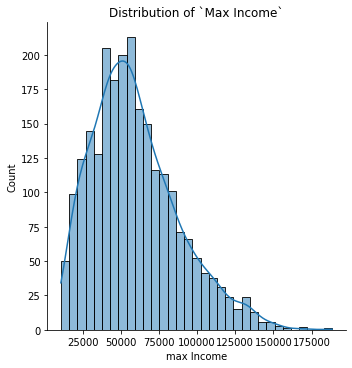

In [17]:
sns.displot(new_data['max Income'],kind="hist", kde=True).set(title='Distribution of `Max Income`')
plt.show()

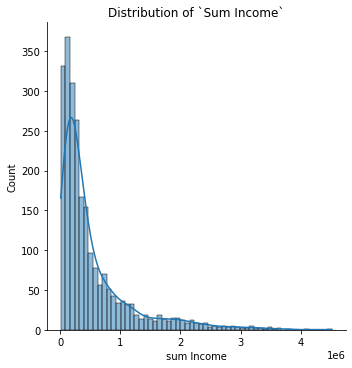

In [18]:
sns.displot(new_data['sum Income'],kind="hist",kde=True).set(title='Distribution of `Sum Income`')
plt.show()

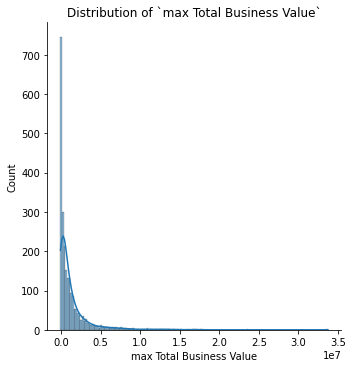

In [19]:
sns.displot(new_data['max Total Business Value'],kind="hist",kde=True).set(title='Distribution of `max Total Business Value`')
plt.show()

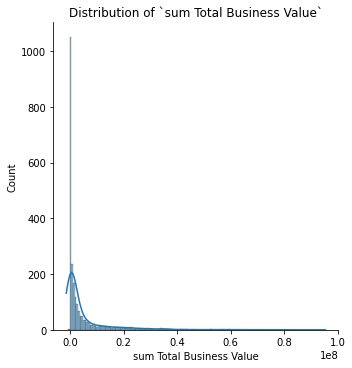

In [20]:
sns.displot(new_data['sum Total Business Value'],kind="hist",kde=True).set(title='Distribution of `sum Total Business Value`')
plt.show()

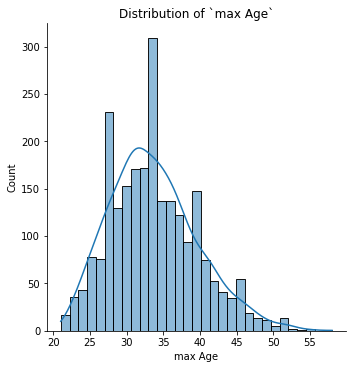

In [21]:
sns.displot(new_data['max Age'],kind="hist",kde=True).set(title='Distribution of `max Age`')
plt.show()

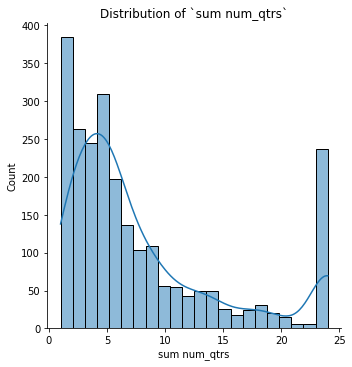

In [22]:
sns.displot(new_data['sum num_qtrs'],kind="hist",kde=True).set(title='Distribution of `sum num_qtrs`')
plt.show()

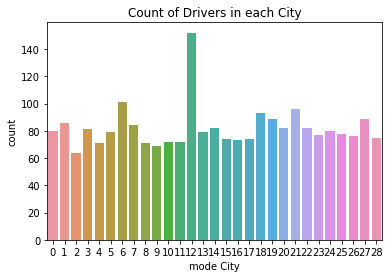

In [23]:
sns.countplot(new_data['mode City']).set(title='Count of Drivers in each City')
plt.show()

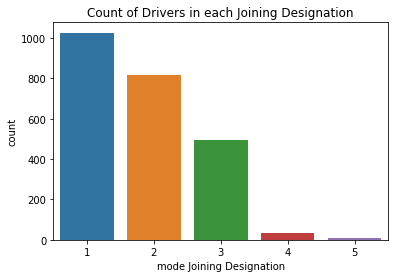

In [24]:
sns.countplot(new_data['mode Joining Designation']).set(title='Count of Drivers in each Joining Designation')
plt.show()

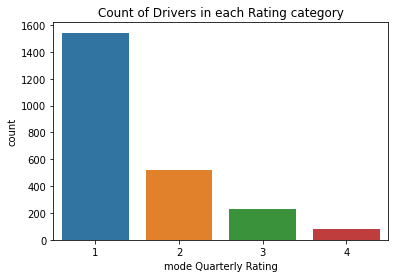

In [25]:
sns.countplot(new_data['mode Quarterly Rating']).set(title='Count of Drivers in each Rating category')
plt.show()

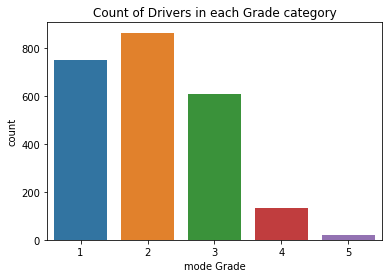

In [26]:
sns.countplot(new_data['mode Grade']).set(title='Count of Drivers in each Grade category')
plt.show()

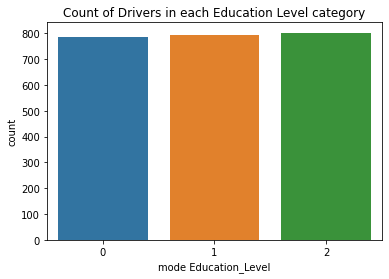

In [27]:
sns.countplot(new_data['mode Education_Level']).set(title='Count of Drivers in each Education Level category')
plt.show()

<div style="font-family:verdana; word-spacing:1.5px; font-size: large;">
    
**Multivariate Analysis**
    
 </div>

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Comparision of median income based on driver ratings**
    
 </div>

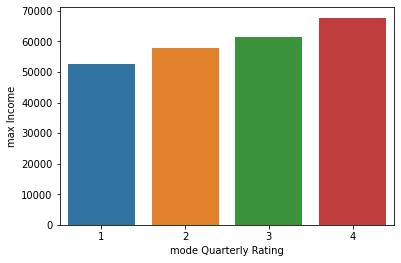

In [28]:
tmp = new_data.copy()
feat = 'mode Quarterly Rating'
out = 'max Income'


tmp = tmp.groupby(feat).median()[out].reset_index()
sns.barplot(data=tmp,y='max Income',x='mode Quarterly Rating')
plt.show()


</div>
<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>Driver income and ratings are directly proportional. 
</i> </p>
</div>


<div style="font-family:verdana; word-spacing:1.5px;">
    
**Comparision of Total Business Value based on driver ratings**
    
 </div>

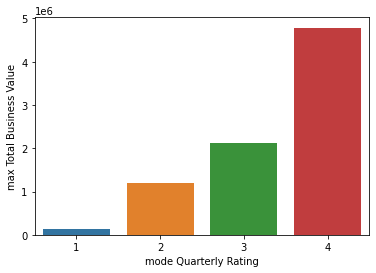

In [29]:
tmp = new_data.copy()
feat = 'mode Quarterly Rating'
out = 'max Total Business Value'


tmp = tmp.groupby(feat).median()[out].reset_index()
sns.barplot(data=tmp,y=out,x=feat)
plt.show()




</div>
<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>Drivers with higher rating contibute most to the Total business value.
Paying driver with higher rating makes sense as they are also giving highest business value. 
</i> </p>
</div>
We'll check now what similar properties are shared by drivers wiith higher ratings

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Comparision of total months of tenure of Drivers based on churn**
    
 </div>

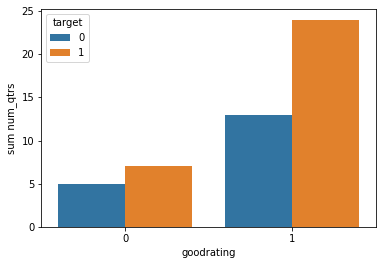

In [30]:
tmp = new_data.copy()
tmp['goodrating'] = 0
tmp.loc[tmp['mode Quarterly Rating']>3,'goodrating'] = 1
tmp['count'] = 1
ktmp = tmp.groupby(['goodrating','target']).median()['sum num_qtrs'].reset_index()
sns.barplot(x=ktmp['goodrating'],y=ktmp['sum num_qtrs'],hue=ktmp['target'])
plt.show()



<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>Drivers who have good rating are generally those who sticked around for more than a year.

Based on this, we can say that :
* Drivers with bad ratings have equal probability of leaving within 6 months.
* Drivers with good ratings tend to leave on completion of year.

We can try to give good promotion and better salary to drivers who completed around 10 months, as it will help us retain drivers with good ratings.</i> </p>
</div>


<div style="font-family:verdana; word-spacing:1.5px;">
    
**Comparision of joining dates of Drivers and their churn**
    
 </div>

<AxesSubplot:xlabel='Dateofjoining month', ylabel='count'>

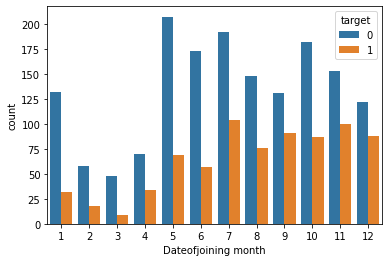

In [31]:
tmp = new_data.copy()

tmp['count'] = 1
ktmp = tmp.groupby(['Dateofjoining month','target']).sum()['count'].reset_index()
sns.barplot(x=ktmp['Dateofjoining month'],y=ktmp['count'],hue=ktmp['target'])




</div>
<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>Drivers who joined between July-December, have high probability of churn.</i> </p>
</div>



Now let's see what could be possible reasons

<AxesSubplot:xlabel='tmp', ylabel='count'>

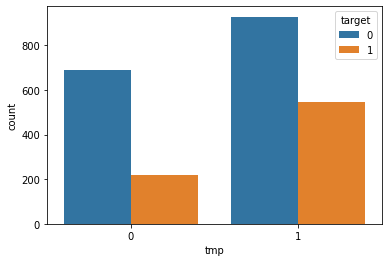

In [32]:
tmp = new_data.copy()
tmp['tmp'] = 0
tmp.loc[tmp['Dateofjoining month']>6,'tmp'] = 1
tmp['count'] = 1
ktmp = tmp.groupby(['tmp','target']).sum()['count'].reset_index()
sns.barplot(x=ktmp['tmp'],y=ktmp['count'],hue=ktmp['target'])




</div>
<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>Drivers joining in last 2 quarters of year, drivers are leaving at much higher rate than the ones who joined in  first 2 quarters.</i> </p>
</div>

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Analysis of Drivers who joined in first half of year**
    
 </div>

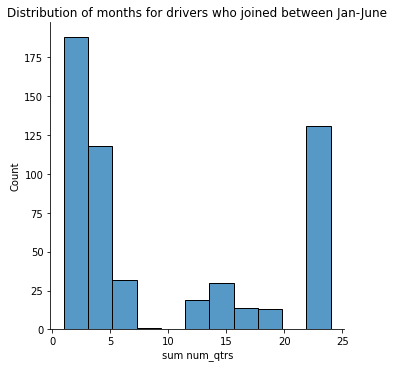

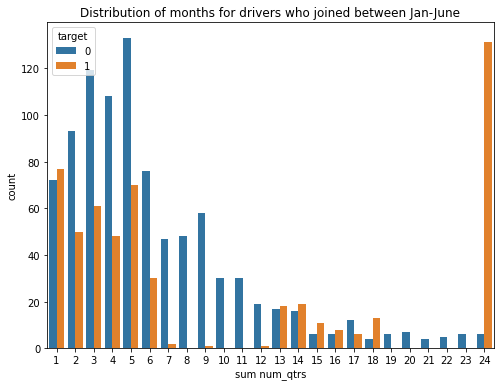

Total count of drivers who left during last 2 quarters 546


In [33]:
tmp = new_data.copy()
tmp['tmp'] = 0

tmp = tmp[tmp['Dateofjoining month']>6]

sns.displot(tmp[tmp['target']==1]['sum num_qtrs']).set(title='Distribution of months for drivers who joined between Jan-June')
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(data=tmp,x='sum num_qtrs',hue='target').set(title='Distribution of months for drivers who joined between Jan-June')
plt.show()
print('Total count of drivers who left during last 2 quarters',tmp['target'].sum())




</div>
<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>Interestingly,  among Drivers who have joined between July-Dec, ones who have completed around 2 years have left most often.</i> </p>
</div>

Let's take a deeper look first on the rightest bar

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Analysis of Drivers who completed 2 years**
    
 </div>

Total 


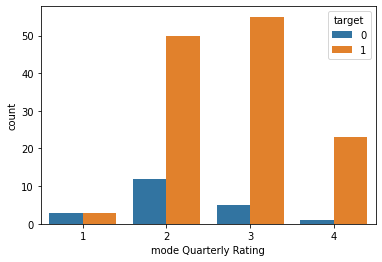

In [34]:
tmp = new_data.copy()
tmp['tmp'] = 0

tmp = tmp[tmp['Dateofjoining month']>6]

tmp = tmp[tmp['sum num_qtrs']>20]

sns.countplot(x=tmp['mode Quarterly Rating'],hue=tmp['target'])
print('Total ',)

</div>
<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>There are lot of drivers leaving with rating around 2-3, which means that they might not be satisfied with the perks they are getting even after sticking for 2 years.

Simply puttng, we must give better incentives to drivers who are completing their 2nd year with company between July-Dec, we can give them better promotion or better salary.</i> </p>
</div>




Now, let's take a deeper look first on the leftest bars.

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Contribution of top-5 cities to total business**
    
 </div>

In [35]:
tmp = new_data.copy()
tmp['goodrating'] = 0
tmp.loc[tmp['mode Quarterly Rating']>2,'goodrating'] = 1
tmp['count'] = 1
ktmp = tmp.groupby(['mode City']).sum()['max Total Business Value'].reset_index().sort_values('max Total Business Value',ascending=False).reset_index(drop=True).reset_index()
#print()
val = ktmp.loc[5,'max Total Business Value']
more = ktmp[ktmp['max Total Business Value']>val].sum().values[2] 
less = ktmp[ktmp['max Total Business Value'] <= val].sum().values[2]
tot = ktmp['max Total Business Value'].sum()

print(more/tot*100,less/tot*100)


24.12516990135227 75.87483009864772


</div>
<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>
    Top 5 cities are responsible for 25% total business value</i> </p>
</div>




Now, let's take a deeper look first on the leftest bars.


<div style="font-family:verdana; word-spacing:1.5px;">
    
**Analysis of top cities which contribute to total business**
    
 </div>

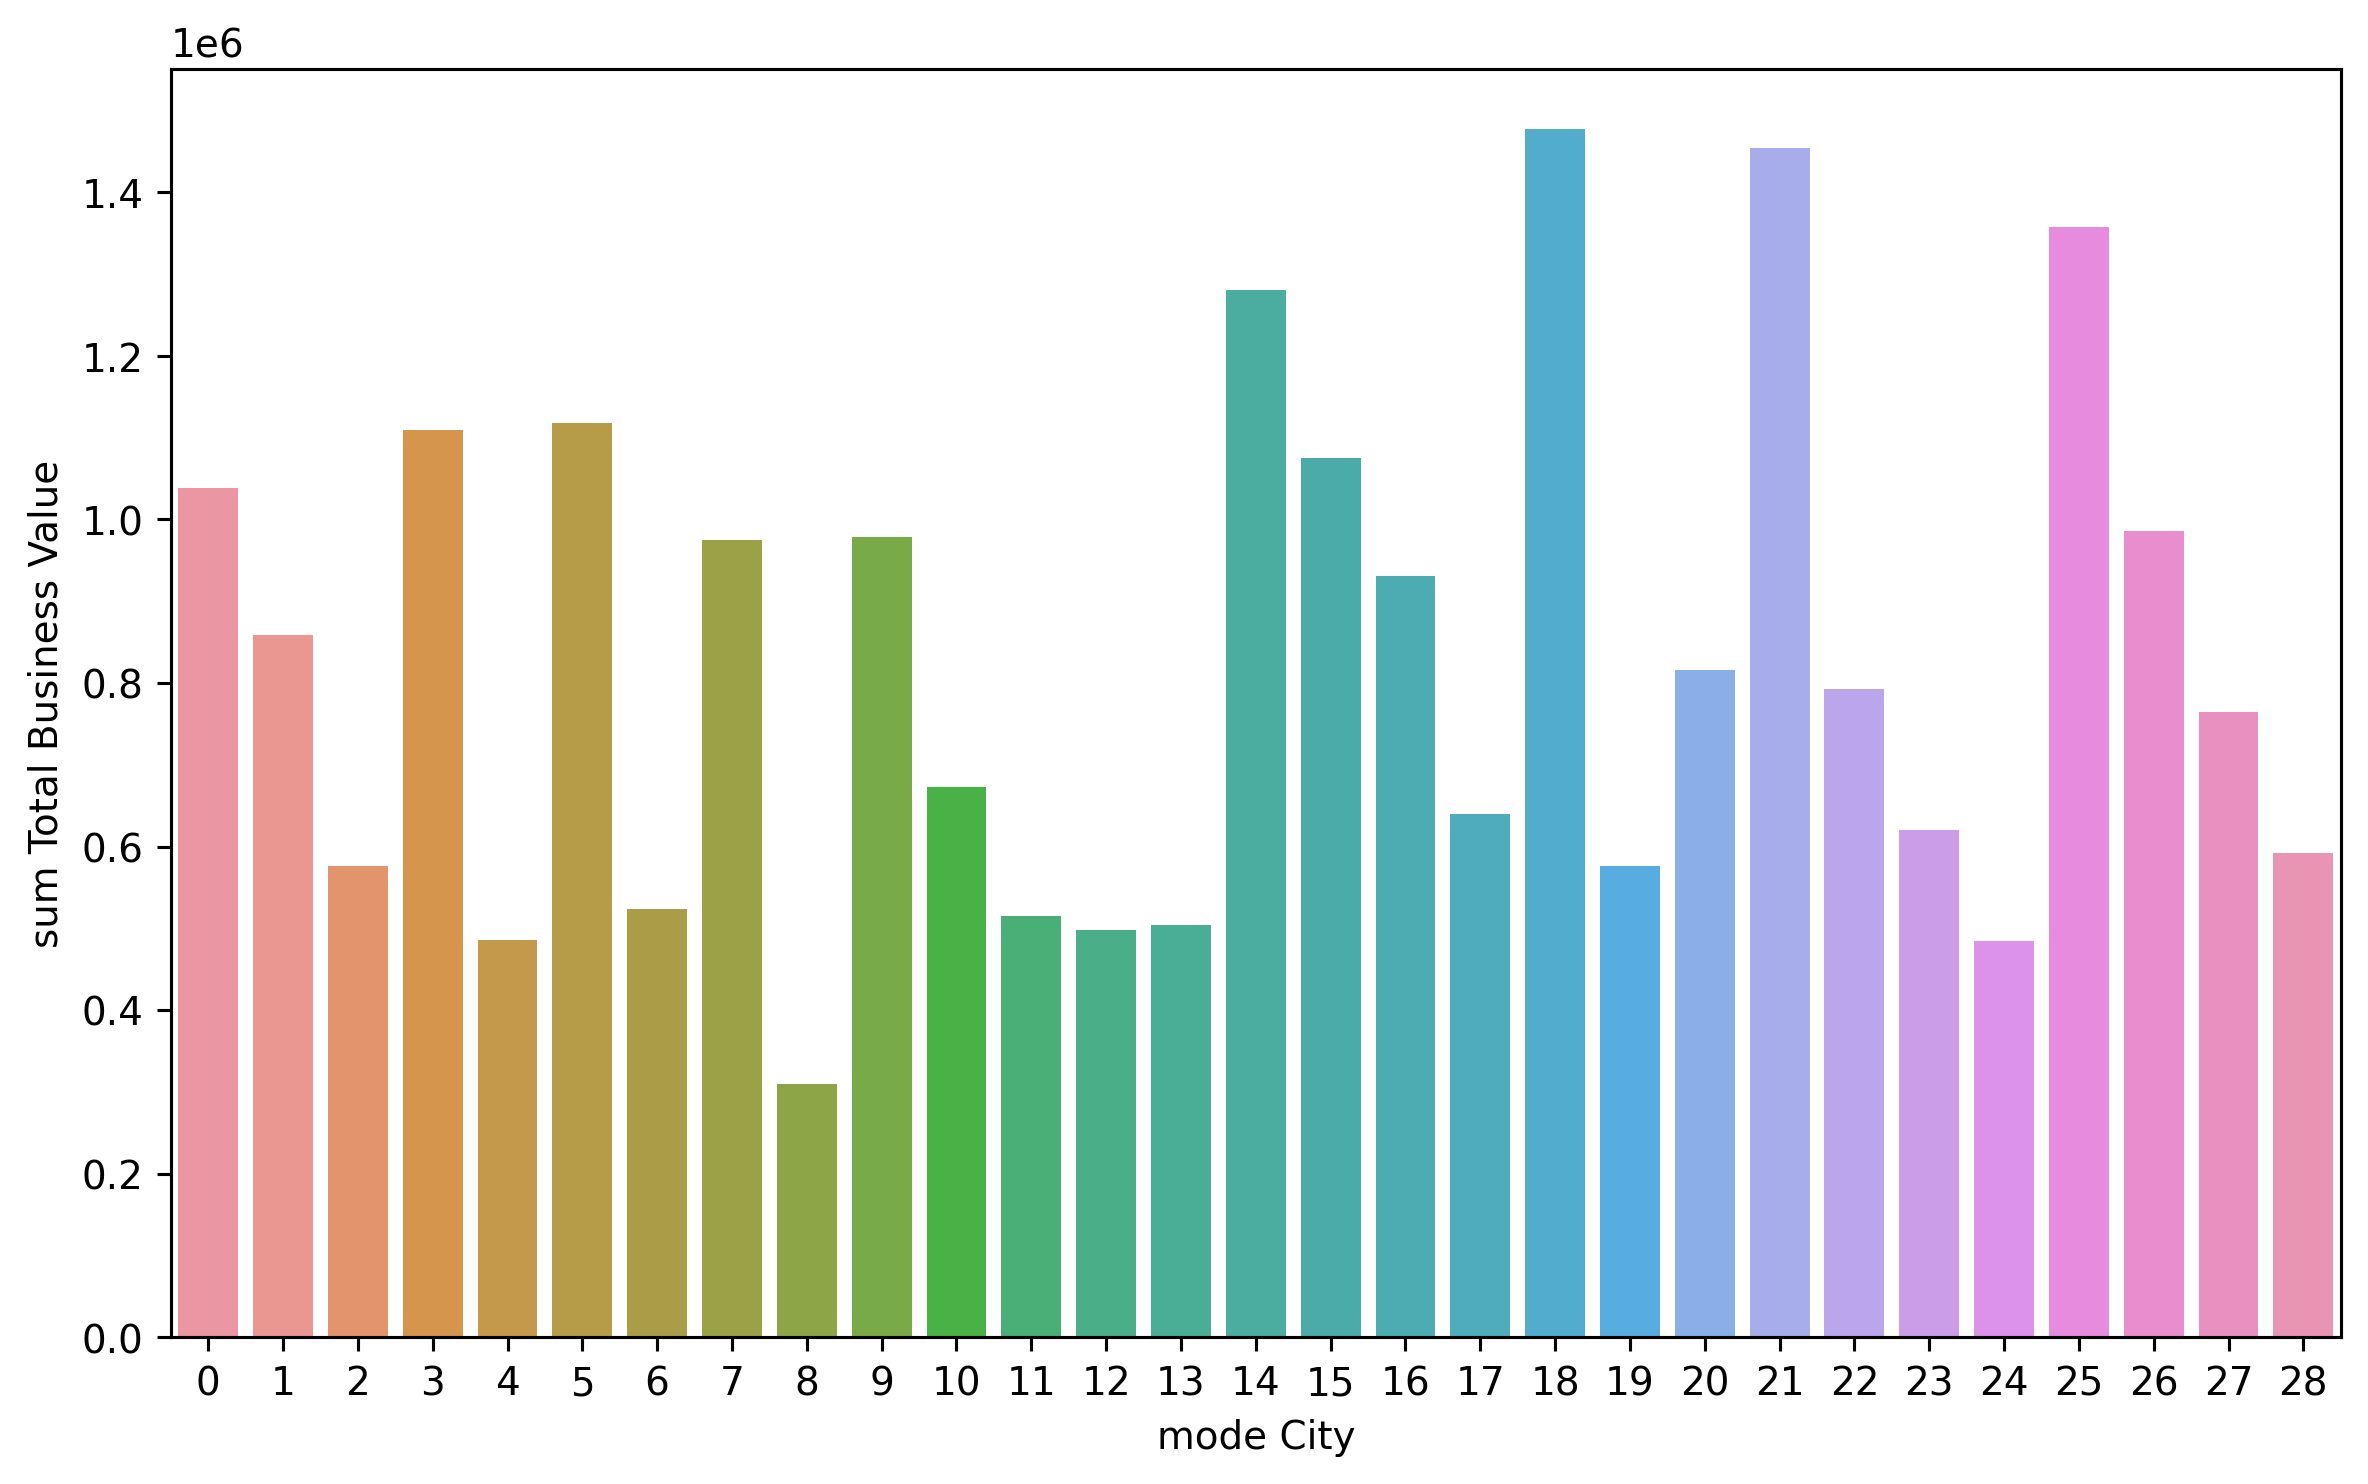

In [36]:
tmp = new_data.copy()
feat = 'mode City'
out = 'sum Total Business Value'


tmp = tmp.groupby(feat).median()[out].reset_index().sort_values(out,ascending=False)
plt.figure(figsize=(10, 6), dpi=280)
sns.barplot(y=tmp[out],x=tmp[feat])
plt.show()


</div>
<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>
    Cities 18,21,25,14,5  are top 5 highest business value producing cities
    We'll check how to reduce driver churn for these cities, because reducing churn here will help in imporving business value.
    </i> </p>
</div>




Now, let's take a deeper look first on the leftest bars.


In [37]:
tmp = new_data.copy()

#tmp = tmp[tmp['mode City'].isin([18,21,25,14,5])]

feat = 'mode City'
out = 'target'
tmp['count'] = 1

tmp = tmp.groupby([feat,out]).count()['count'].reset_index().sort_values('count',ascending=False)

tmp = tmp[tmp['target'] == 0].merge(tmp[tmp['target'] == 1],on='mode City',how='outer')
tmp['ratio'] = round(tmp['count_y']/tmp['count_x'],2)
tmp = tmp.sort_values('ratio',ascending=False)
high_churn_cities = list(tmp[tmp['ratio'] >0.5]['mode City'])

tmp = new_data.copy()

tmp = tmp[tmp['mode City'].isin(high_churn_cities)]
feat = 'mode Joining Designation'
out = 'target'
tmp['count'] = 1


feat = "mode City"
out = "sum num_qtrs"
tar = "target"
tmp = tmp.groupby([feat,out,tar]).count()['count'].reset_index().sort_values('count',ascending=False).sort_values('count',ascending=False)
tmp = tmp.head(25)

tmp = tmp[tmp['target'] == 0].merge(tmp[tmp['target'] == 1],on=["sum num_qtrs",feat],how='outer').fillna(0)

tmp['ratio'] = round(tmp['count_y']/tmp['count_x'],2)
tmp = tmp.sort_values('ratio',ascending=False)
tmp[tmp['ratio']>5]

,mode City,sum num_qtrs,target_x,count_x,target_y,count_y,ratio
24,24,24,0.0,0.0,1.0,8.0,inf
23,7,24,0.0,0.0,1.0,9.0,inf
22,13,24,0.0,0.0,1.0,9.0,inf
21,3,24,0.0,0.0,1.0,10.0,inf
20,27,24,0.0,0.0,1.0,12.0,inf
19,21,24,0.0,0.0,1.0,12.0,inf
18,14,24,0.0,0.0,1.0,13.0,inf


</div>
<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
<i>
    In cities [24,7,13,3,27,21,14] all the drivers who left have completed 2 years with the company, this means we need to focus on the set of drivers who completed 2 years in these cities</i> </p>
</div>


<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Preprocessing of Data for Prediction</p>

In [38]:
new_data = new_data.select_dtypes(exclude=['datetime'])

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Using K-NN imputer for filling in missing values**
    
 </div>

In [39]:
imputer = KNNImputer(n_neighbors=2)
tmp = new_data.select_dtypes(exclude=['datetime'])
imputed_data = imputer.fit_transform(tmp)
imputed_data = pd.DataFrame(imputed_data )
imputed_data.columns = tmp.columns

In [40]:
imputed_data.isna().sum()

 Driver_ID                              0
max Age                                 0
mode Gender                             0
mode City                               0
mode Education_Level                    0
max Income                              0
sum Income                              0
mode Joining Designation                0
max Grade                               0
mode Grade                              0
min Total Business Value                0
max Total Business Value                0
sum Total Business Value                0
sum num_qtrs                            0
mode Quarterly Rating                   0
min times_quarterly_rating_decreased    0
max times_quarterly_rating_increased    0
min times_income_decreased              0
max times_income_increased              0
Dateofjoining year                      0
Dateofjoining month                     0
target                                  0
dtype: int64

In [41]:
imputed_data

,Driver_ID,max Age,mode Gender,mode City,mode Education_Level,max Income,sum Income,mode Joining Designation,max Grade,mode Grade,...,sum Total Business Value,sum num_qtrs,mode Quarterly Rating,min times_quarterly_rating_decreased,max times_quarterly_rating_increased,min times_income_decreased,max times_income_increased,Dateofjoining year,Dateofjoining month,target
0,1.0,28.0,0.0,15.0,2.0,57387.0,172161.0,1.0,1.0,1.0,...,1715580.0,3.0,2.0,0.0,0.0,0.0,0.0,2018.0,12.0,0.0
1,2.0,31.0,0.0,26.0,2.0,67016.0,134032.0,2.0,2.0,2.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2020.0,11.0,1.0
2,4.0,43.0,0.0,4.0,2.0,65603.0,328015.0,2.0,2.0,2.0,...,350000.0,5.0,1.0,0.0,0.0,0.0,0.0,2019.0,12.0,0.0
3,5.0,29.0,0.0,28.0,0.0,46368.0,139104.0,1.0,1.0,1.0,...,120360.0,3.0,1.0,0.0,0.0,0.0,0.0,2019.0,1.0,0.0
4,6.0,31.0,1.0,2.0,1.0,78728.0,393640.0,3.0,3.0,3.0,...,1265000.0,5.0,2.0,0.0,1.0,0.0,0.0,2020.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784.0,34.0,0.0,16.0,0.0,82815.0,1987560.0,2.0,3.0,3.0,...,21748820.0,24.0,3.0,-2.0,2.0,0.0,0.0,2015.0,10.0,1.0
2377,2785.0,34.0,1.0,28.0,0.0,12105.0,36315.0,1.0,1.0,1.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2020.0,8.0,0.0
2378,2786.0,45.0,0.0,10.0,0.0,35370.0,318330.0,2.0,2.0,2.0,...,2815090.0,9.0,2.0,-1.0,0.0,0.0,0.0,2018.0,7.0,0.0
2379,2787.0,28.0,1.0,12.0,2.0,69498.0,416988.0,1.0,1.0,1.0,...,977830.0,6.0,1.0,-1.0,0.0,0.0,0.0,2018.0,7.0,0.0


In [42]:

imputed_data['target'] = imputed_data['target'].astype(int)

In [43]:
imputed_data.drop([' Driver_ID'],inplace=True,axis=1)

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Checking Correlation among variables**
    
 </div>

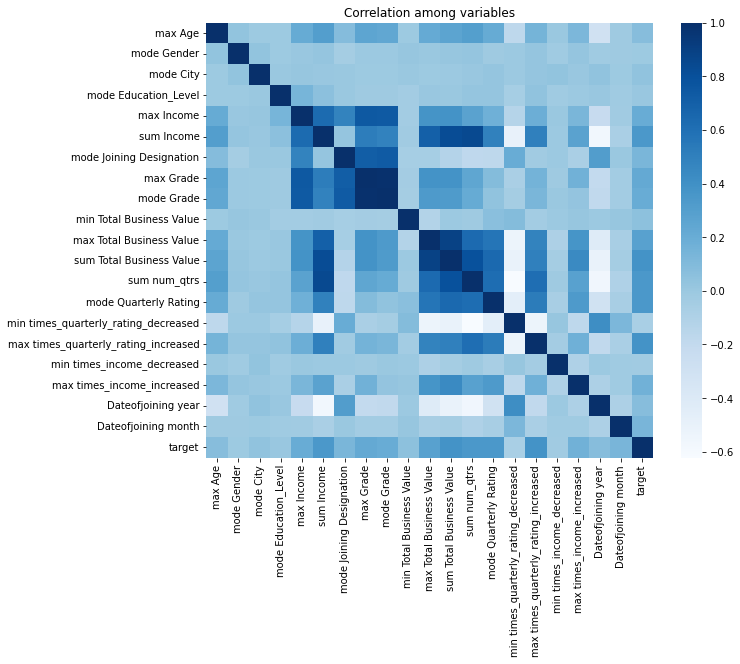

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(imputed_data.corr(), cmap='Blues').set(title="Correlation among variables")
plt.show()

As can be seen, the data is imbalanced

In [45]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   max Age                               2381 non-null   float64
 1   mode Gender                           2381 non-null   float64
 2   mode City                             2381 non-null   float64
 3   mode Education_Level                  2381 non-null   float64
 4   max Income                            2381 non-null   float64
 5   sum Income                            2381 non-null   float64
 6   mode Joining Designation              2381 non-null   float64
 7   max Grade                             2381 non-null   float64
 8   mode Grade                            2381 non-null   float64
 9   min Total Business Value              2381 non-null   float64
 10  max Total Business Value              2381 non-null   float64
 11  sum Total Busines

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from catboost import CatBoostClassifier

<div style="font-family:verdana; word-spacing:1.5px;">
    
**One-hot encoding of categorical variables**
    
 </div>

In [47]:
dd = pd.get_dummies(np.array(imputed_data['mode City'].astype(int))).astype(int)
imputed_data = imputed_data.drop(['mode City'],axis=1)
imputed_data = pd.concat([imputed_data,dd],axis=1)

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Preparing data for training**
    
 </div>

In [48]:
X =imputed_data.drop(['target'],axis=1)
y = imputed_data['target']

In [49]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   max Age                               2381 non-null   float64
 1   mode Gender                           2381 non-null   float64
 2   mode Education_Level                  2381 non-null   float64
 3   max Income                            2381 non-null   float64
 4   sum Income                            2381 non-null   float64
 5   mode Joining Designation              2381 non-null   float64
 6   max Grade                             2381 non-null   float64
 7   mode Grade                            2381 non-null   float64
 8   min Total Business Value              2381 non-null   float64
 9   max Total Business Value              2381 non-null   float64
 10  sum Total Business Value              2381 non-null   float64
 11  sum num_qtrs     

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [51]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{0: 1083, 1: 512}
{0: 533, 1: 253}


In [52]:
X.shape

(2381, 48)

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Training Classifiers**
    
 </div>

In [53]:
clf = BaggingClassifier(base_estimator=SVC(),
                         n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))
scores = np.mean(cross_val_score(clf, X_train, y_train, cv=5,scoring='f1'))
print(scores)

              precision    recall  f1-score   support

           0       0.75      0.97      0.85      1083
           1       0.84      0.32      0.46       512

    accuracy                           0.76      1595
   macro avg       0.79      0.64      0.65      1595
weighted avg       0.78      0.76      0.72      1595

0.45378716563890764


In [54]:
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))
scores = np.mean(cross_val_score(clf, X_train, y_train, cv=5,scoring='f1'))
print(scores)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1083
           1       1.00      1.00      1.00       512

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595

0.8403494320285148


In [55]:

clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

scores = np.mean(cross_val_score(clf, X_train, y_train, cv=5,scoring='f1'))
print(scores)


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1083
           1       0.92      0.95      0.93       512

    accuracy                           0.96      1595
   macro avg       0.95      0.95      0.95      1595
weighted avg       0.96      0.96      0.96      1595

0.8779599659908921


In [56]:

clf = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))
scores = np.mean(cross_val_score(clf, X_train, y_train, cv=5,scoring='f1'))
print(scores)



              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1083
           1       0.87      0.89      0.88       512

    accuracy                           0.92      1595
   macro avg       0.91      0.91      0.91      1595
weighted avg       0.92      0.92      0.92      1595

0.8504239613180979


In [57]:

clf = xgb.XGBClassifier(random_state=0,verbose=False).fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))
scores = np.mean(cross_val_score(clf, X_train, y_train, cv=5,scoring='f1',verbose=False))
print(scores)



[17:58:14] WARNING: ../src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:58:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1083
           1       1.00      1.00      1.00       512

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595

[17:58:14] WARNING: ../src/learner.cc:576: 
Parameters: { "verb

In [58]:
clf = CatBoostClassifier(verbose=False).fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))
scores = np.mean(cross_val_score(clf, X_train, y_train, cv=5,scoring='f1'))
print(scores)



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1083
           1       0.97      0.97      0.97       512

    accuracy                           0.98      1595
   macro avg       0.98      0.98      0.98      1595
weighted avg       0.98      0.98      0.98      1595

0.8758041174261655


<div style="font-family:verdana; word-spacing:1.5px;">
    
**Comparing performances of Classifiers**
    
 </div>

<table>
<tbody>
<tr>
  <td><b>Classifiers</b></td>
  <td><b>Performance (F1-score)</b></td>
</tr>
<tr>
<td>BaggingClassifier with SVC</td>
<td>0.45</td>
</tr>
<tr>
<td>RandomForest;</td>
<td>0.84</td>
</tr>
<tr>
<td>GradientBoosting</td>
<td>0.878</td>
</tr>
<tr>
<td>AdaBoost</td>
<td>0.850</td>
</tr>
<tr>
<td>XGBoost</td>
<td>0.876</td>
</tr>
  <tr>
<td>CatBoost</td>
<td>0.875</td>
</tr>
</tbody>
</table>

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
**Gradient Boosting** Classifier has maximum F1-score, so we'll go ahead with it and find optimal params.
    </div>

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Hyperparameter tuning for Gradient Boosting Classifier**
    
 </div>

In [59]:

print("Parameter optimization")
gb_model = GradientBoostingClassifier(random_state=0,verbose=False)
clf = GridSearchCV(gb_model,{
                    "n_estimators":[100,150,200],
                    "max_depth":[1,2,3,4],
                    "learning_rate":[0.1,0.12,0.9],
'min_samples_split':[2,3,4]}
                   , verbose=0, n_jobs=4,scoring='f1',cv=3)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)



Parameter optimization


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

0.8837904786302109
{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 4, 'n_estimators': 150}


<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">With most optimal params, our model got an f1-score of 0.88.</div>

We'll now train our model on whole training data with these parameters.

In [60]:
clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, min_samples_split= 4, n_estimators= 150)


In [61]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=2, min_samples_split=4, n_estimators=150)

In [62]:
y_probs = clf.predict_proba(X_test)

In [63]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       533
           1       0.88      0.92      0.90       253

    accuracy                           0.93       786
   macro avg       0.92      0.93      0.92       786
weighted avg       0.93      0.93      0.93       786



In [64]:
TN, FP, FN, TP = confusion_matrix(list(y_test), list(y_pred)).ravel()

f1_score = 2*TP/(2*TP + FP +FN)
print("F1-score on test set ",f1_score)

F1-score on test set  0.8957528957528957


<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">This is good performance on test set, this means our model is able to generalize well on unseen data</div>

Let's train the model with all data and check performance using crossvalidation

In [65]:
scores = np.mean(cross_val_score(clf, X, y, cv=10,scoring='f1'))
print(scores)


0.8871210651815815
0.8870346598202824


Our model gave a F1-score of 0.88 which is  good.

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc

<div style="font-family:verdana; word-spacing:1.5px;">
    
**ROC Curve and AUC**
    
 </div>

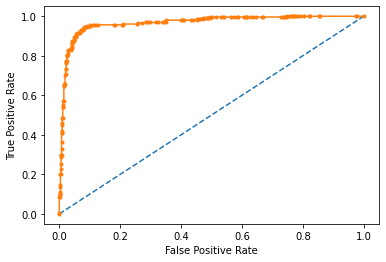

In [67]:

# retrieve just the probabilities for the positive class
pos_probs = y_probs[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
#plt.legend()
# show the plot
plt.show()

In [68]:
roc_auc = roc_auc_score(y_test, pos_probs)
print('ROC AUC : ', roc_auc)

ROC AUC :  0.9665700153505032


<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">ROC-AUC is close to 1 which tells that our model is doing good predictions on both classes. This means our model is able to balance well between TPR and FPR.</div>

<div style="font-family:verdana; word-spacing:1.5px;">
    
**Precision-Recall**
    
Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).
    
 </div>
 

In [69]:
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

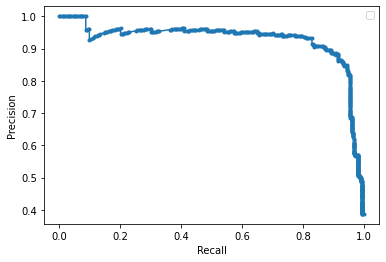

In [70]:

# plot the no skill precision-recall curve
#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [71]:
auc_score = auc(recall, precision)
print('PR AUC : ', roc_auc)

PR AUC :  0.9665700153505032


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">PR-AUC is close to 1 which tells that our model is doing good predictions on both classes.
This means that model is able to balance both good precision and recall.</div>

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Actions and Insights</p>

* Driver income and ratings are directly proportional.

* Drivers with higher rating contibute most to the Total business value. Paying driver with higher rating makes sense as they are also giving highest business value.


* Drivers who have good rating are generally those who sticked around for more than a year.
Based on this, we can say that :
* Drivers with bad ratings have equal probability of leaving within 6 months.
* Drivers with good ratings tend to leave on completion of year.
We can try to give good promotion and better salary to drivers who completed around 10 months, as it will help us retain drivers with good ratings.


* Drivers who joined between July-December, have high probability of churn.


* Drivers joining in last 2 quarters of year, drivers are leaving at much higher rate than the ones who joined in first 2 quarters.

* Interestingly, among Drivers who have joined between July-Dec, ones who have completed around 2 years have left most often.


* There are lot of drivers leaving with rating around 2-3, which means that they might not be satisfied with the perks they are getting even after sticking for 2 years.
Simply puttng, we must give better incentives to drivers who are completing their 2nd year with company between July-Dec, we can give them better promotion or better salary.


* Top 5 cities are responsible for 25% total business value

* Cities 18,21,25,14,5 are top 5 highest business value producing cities.

* In cities [24,7,13,3,27,21,14] all the drivers who left have completed 2 years with the company, this means we need to focus on the set of drivers who completed 2 years in these cities